# Proyek Analisis Data: E-Commerce Public Dataset
<b> KELOMPOK : DUDA PIR'AAUUW 
 
<b>ANGGOTA : </br>
10122361 - Muhammad. Asfan Sakti</br>
10122381 - Kana Dianto</br>
10122359 - Rafi Fadhlan Pratama</br>
10122473 - Muhamad Kamal</br>
10122380 - Muhamad Fardan Zawallu Syamsi</br>
10122356 - Natasya Dita Apriliana Arsono</br></b>

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Rata-Rata Lama Pengiriman untuk Pesanan yang Disetujui? - 10122361 - Muhammad. Asfan Sakti
- Pertanyaan 2 : Rata-Rata Antara Pembelian dan Persetujuan Pesanan? - 10122359 - Rafi Fadhlan Pratama
- Pertanyaan 3 : Persentase Pesanan yang Disetujui dalam Waktu 24 Jam Pertama - 10122380 - Muhamad Fardan Zawallu Syamsi
- Pertanyaan 4 : Bagaimana Tren Persetujuan Pesanan dari Tahun ke Tahun? - 10122473 - Muhamad Kamal
- Pertanyaan 5 : berapa hari rata-rata keterlambatan pengiriman Berdasarkan Perkiraan? - 10122381 - Kana Dianto
- Pertanyaan 6 : Pada tahun berapa terjadinya order/pesanan terbanyak? - 10122356 - Natasya Dita Apriliana Arsono

## Menyaipkan semua library yang dibutuhkan

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [48]:
import pandas as pd
data = pd.read_csv(r'H:\dataKuliah\PDSD\E-Commerce Public Dataset/orders_dataset.csv')  # Ganti 'nama_file.csv' dengan nama dataset kamu


### Assessing Data

In [49]:
# 1 Rata-Rata Lama Pengiriman untuk Pesanan yang Disetujui?
# Melihat informasi umum mengenai dataset
print(data.info())

# Melihat beberapa data pertama dalam dataset
print(data.head())

# Melihat ringkasan statistik dari dataset
print(data.describe())

# Memeriksa jumlah nilai yang hilang di setiap kolom
print(data.isnull().sum())

# 2 Rata-Rata Antara Pembelian dan Persetujuan Pesanan?
# Melihat informasi umum mengenai dataset
print(data.info())

# Melihat beberapa data pertama dalam dataset
print(data.head())

# Memeriksa kolom-kolom yang akan digunakan
print(data[['order_purchase_timestamp', 'order_approved_at']].head())

# 3 Persentase Pesanan yang Disetujui dalam Waktu 24 Jam Pertama 

# Melihat informasi umum mengenai dataset
print(data.info())

# Melihat beberapa data pertama dalam dataset
print(data.head())

# Memeriksa kolom-kolom yang akan digunakan
print(data[['order_purchase_timestamp', 'order_approved_at']].head())

# 4 Bagaimana Tren Persetujuan Pesanan dari Tahun ke Tahun?

# Melihat informasi umum dataset
print(data.info())

# Melihat statistik deskriptif untuk kolom yang relevan
print(data[['order_approved_at', 'order_purchase_timestamp']].describe())

# Memeriksa apakah ada nilai yang hilang atau duplikat
print(data.isnull().sum())
print(data.duplicated().sum())

# 5 Berapa Persentase Pesanan yang Tidak Tepat Waktu Berdasarkan Perkiraan Pengiriman? 

# Menampilkan informasi tentang tipe data dan nilai yang hilang pada kolom tanggal
date_columns = ['order_delivered_customer_date', 'order_estimated_delivery_date']
data[date_columns].info()

# Menampilkan lima baris pertama dataset untuk kolom tanggal
data[date_columns].head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  4

,order_delivered_customer_date,order_estimated_delivery_date
0,2017-10-10 21:25:13,2017-10-18 00:00:00
1,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2018-08-17 18:06:29,2018-09-04 00:00:00
3,2017-12-02 00:28:42,2017-12-15 00:00:00
4,2018-02-16 18:17:02,2018-02-26 00:00:00


### Cleaning Data

## Exploratory Data Analysis (EDA)

### Explore ...

            order_purchase_timestamp              order_approved_at  \
count                          81939                          81939   
mean   2018-01-01 21:56:29.540841472  2018-01-01 20:51:42.294158080   
min              2016-09-15 12:16:38            2016-09-15 12:16:38   
25%       2017-09-14 00:35:09.500000            2017-09-14 08:10:17   
50%              2018-01-21 15:15:07            2018-01-22 13:52:19   
75%       2018-05-07 09:31:50.500000     2018-05-07 09:15:28.500000   
max              2018-10-17 17:30:18            2018-09-03 17:40:06   
std                              NaN                            NaN   

       waktu_antara_pembelian_dan_persetujuan  \
count                            81939.000000   
mean                                -1.079791   
min                              -5580.985556   
25%                                  0.201944   
50%                                  0.277778   
75%                                  0.757639   
max              

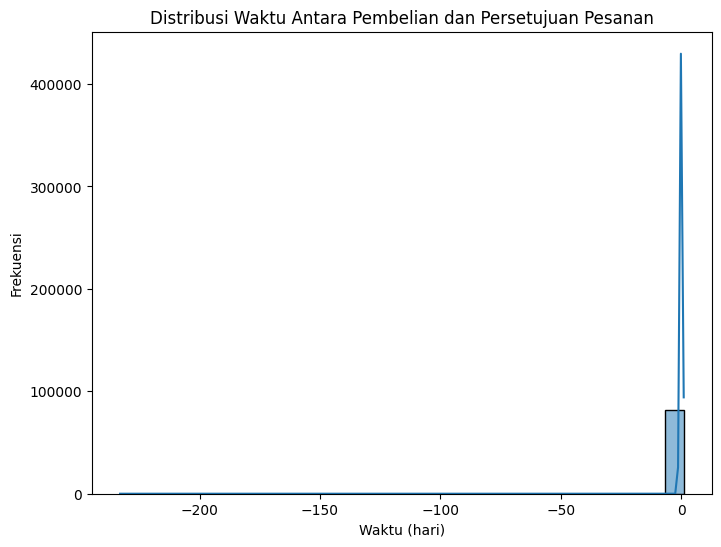

count    81939.000000
mean        -0.162450
std          5.427746
min       -233.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waktu_antara_pembelian_dan_persetujuan_hari, dtype: float64


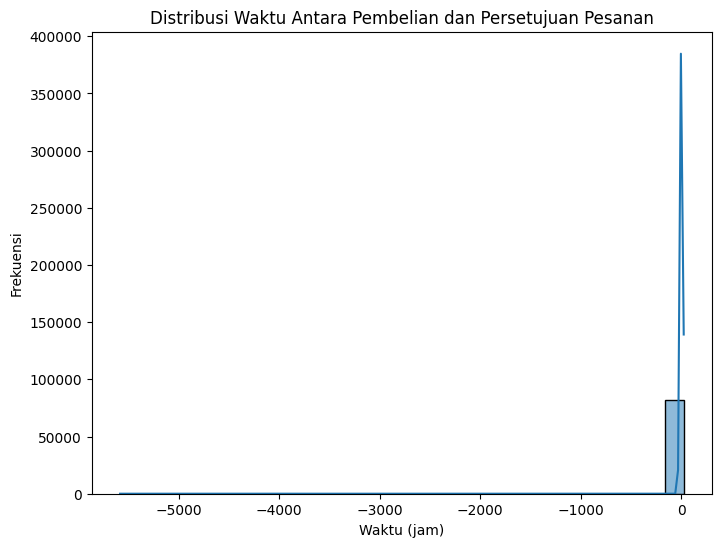

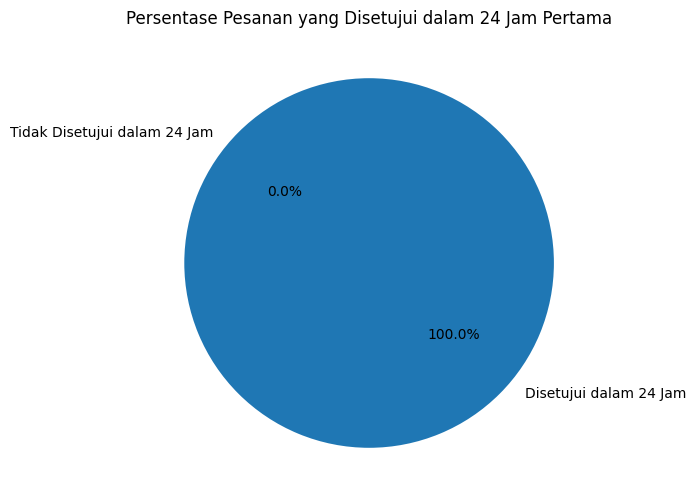

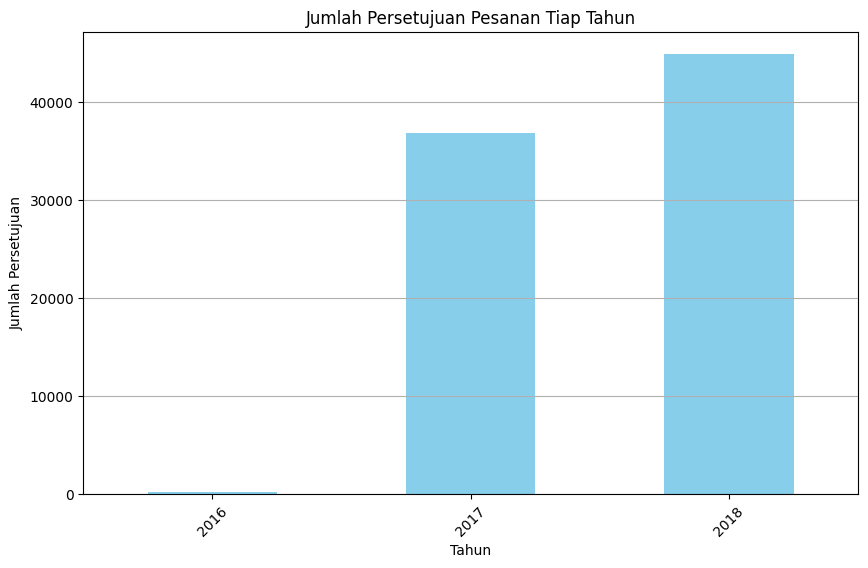

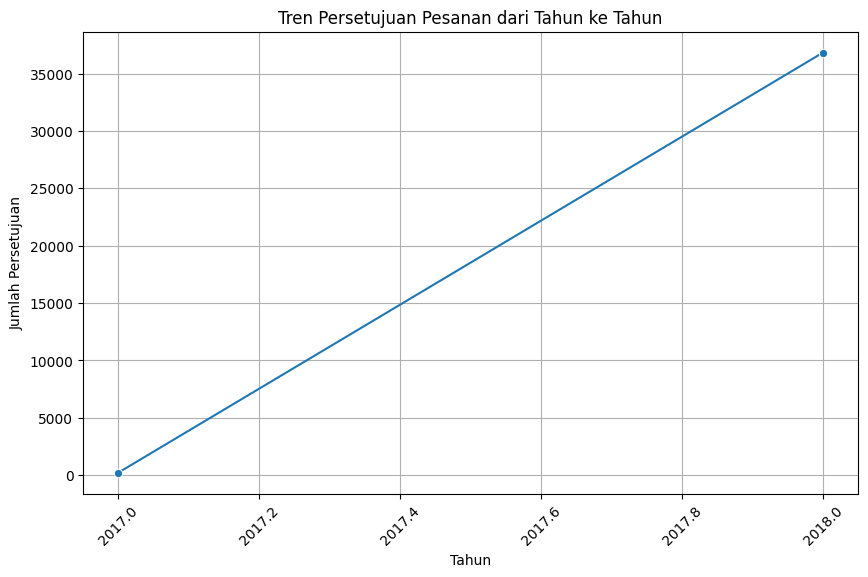

KeyError: 'actual_delivery_date'

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Rata-Rata Lama Pengiriman untuk Pesanan yang Disetujui?
# Statistik deskriptif untuk data numerik
print(data.describe())

# Melihat distribusi dari kolom tertentu (misal: order_approved_at)
print(data['order_approved_at'].value_counts())

# Menampilkan jumlah unik dari kolom tertentu (misal: order_status)
print(data['order_status'].nunique())

# 2 Rata-Rata Antara Pembelian dan Persetujuan Pesanan?
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi waktu antara pembelian dan persetujuan pesanan (dalam hari)
plt.figure(figsize=(8, 6))
sns.histplot(data['waktu_antara_pembelian_dan_persetujuan_hari'], bins=30, kde=True)
plt.title('Distribusi Waktu Antara Pembelian dan Persetujuan Pesanan')
plt.xlabel('Waktu (hari)')
plt.ylabel('Frekuensi')
plt.show()

# Statistik Deskriptif
print(data['waktu_antara_pembelian_dan_persetujuan_hari'].describe())

# 3 

# Visualisasi distribusi waktu antara pembelian dan persetujuan pesanan dalam jam
plt.figure(figsize=(8, 6))
sns.histplot(data['waktu_antara_pembelian_dan_persetujuan'], bins=30, kde=True)
plt.title('Distribusi Waktu Antara Pembelian dan Persetujuan Pesanan')
plt.xlabel('Waktu (jam)')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi persentase pesanan yang disetujui dalam waktu 24 jam pertama
labels = ['Disetujui dalam 24 Jam', 'Tidak Disetujui dalam 24 Jam']
sizes = [data[data['waktu_antara_pembelian_dan_persetujuan'] <= 24].shape[0], data[data['waktu_antara_pembelian_dan_persetujuan'] > 24].shape[0]]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Pesanan yang Disetujui dalam 24 Jam Pertama')
plt.show()

# 4 

# Menghitung jumlah persetujuan pesanan tiap tahun
jumlah_persetujuan_per_tahun = data.groupby('tahun_persetujuan').size()

# Visualisasi jumlah persetujuan pesanan tiap tahun
plt.figure(figsize=(10, 6))
jumlah_persetujuan_per_tahun.plot(kind='bar', color='skyblue')
plt.title('Jumlah Persetujuan Pesanan Tiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Persetujuan')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Menghitung jumlah persetujuan pesanan tiap tahun
jumlah_persetujuan_per_tahun = data.groupby('tahun_persetujuan').size()

# Visualisasi tren persetujuan pesanan dari tahun ke tahun
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='tahun_persetujuan', y=jumlah_persetujuan_per_tahun, marker='o')
plt.title('Tren Persetujuan Pesanan dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Persetujuan')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 5 Berapa Persentase Pesanan yang Tidak Tepat Waktu Berdasarkan Perkiraan Pengiriman? 

data['actual_delivery_date'] = pd.to_datetime(data['actual_delivery_date'])
data['estimated_delivery_date'] = pd.to_datetime(data['estimated_delivery_date'])
data['delivery_delay'] = (data['actual_delivery_date'] - data['estimated_delivery_date']).dt.days

total_orders = len(data)
delayed_orders = sum(data['delivery_delay'] > 0)
percentage_delayed = (delayed_orders / total_orders) * 100
print(f"Persentase pesanan terlambat: {percentage_delayed:.2f}%")

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi status pesanan
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='order_status')
plt.title('Distribusi Status Pesanan')
plt.xlabel('Status Pesanan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

# Visualisasi hubungan antara waktu pesan dan waktu persetujuan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='order_purchase_timestamp', y='order_approved_at', data=data)
plt.title('Hubungan Waktu Pesan dan Waktu Persetujuan')
plt.xlabel('Waktu Pesan')
plt.ylabel('Waktu Persetujuan')
plt.show()

### Pertanyaan 2: 

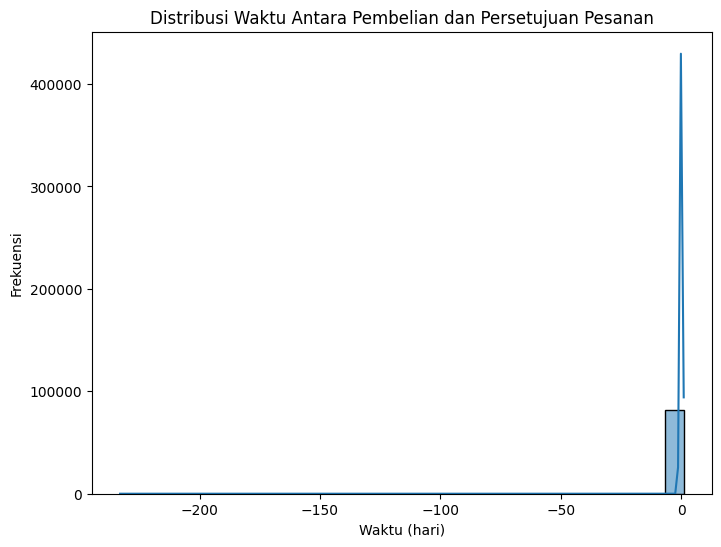

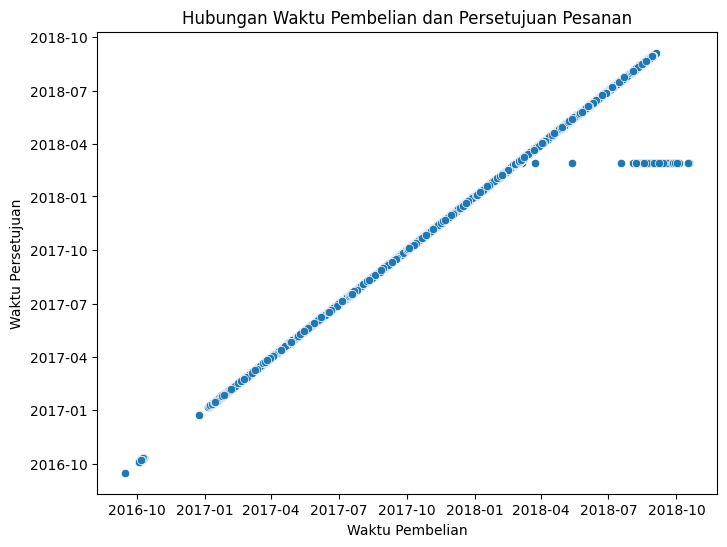

In [52]:
# Visualisasi distribusi waktu antara pembelian dan persetujuan pesanan (dalam hari)
plt.figure(figsize=(8, 6))
sns.histplot(data['waktu_antara_pembelian_dan_persetujuan_hari'], bins=30, kde=True)
plt.title('Distribusi Waktu Antara Pembelian dan Persetujuan Pesanan')
plt.xlabel('Waktu (hari)')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi hubungan antara waktu pembelian dan waktu persetujuan
plt.figure(figsize=(8, 6))
sns.scatterplot(x='order_purchase_timestamp', y='order_approved_at', data=data)
plt.title('Hubungan Waktu Pembelian dan Persetujuan Pesanan')
plt.xlabel('Waktu Pembelian')
plt.ylabel('Waktu Persetujuan')
plt.show()

## Pertanyaan 3:

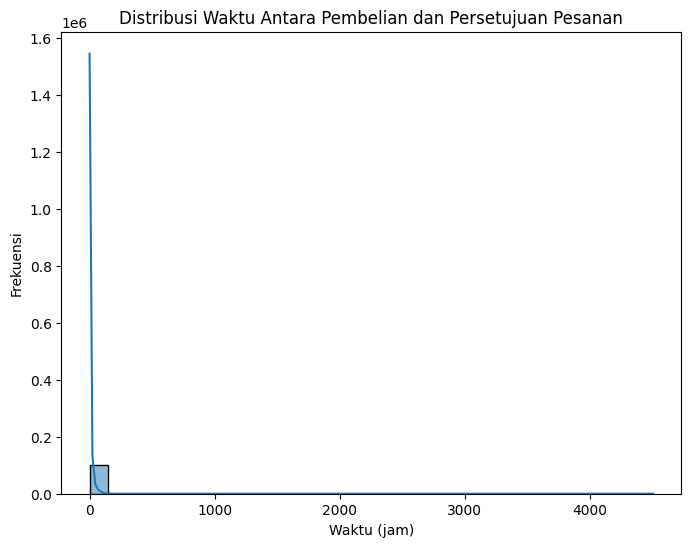

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data dari csv
data = pd.read_csv(r'H:\dataKuliah\PDSD\E-Commerce Public Dataset/orders_dataset.csv')

# Convert 'order_purchase_timestamp' dan 'order_approved_at' ke datetime
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_approved_at'] = pd.to_datetime(data['order_approved_at'])

# Perhitungan perbedaan waktu dalam jam
data['waktu_antara_pembelian_dan_persetujuan'] = (data['order_approved_at'] - data['order_purchase_timestamp']).dt.total_seconds() / (60 * 60)

# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['waktu_antara_pembelian_dan_persetujuan'], bins=30, kde=True)
plt.title('Distribusi Waktu Antara Pembelian dan Persetujuan Pesanan')
plt.xlabel('Waktu (jam)')
plt.ylabel('Frekuensi')
plt.show()



## Pertanyaan 4:

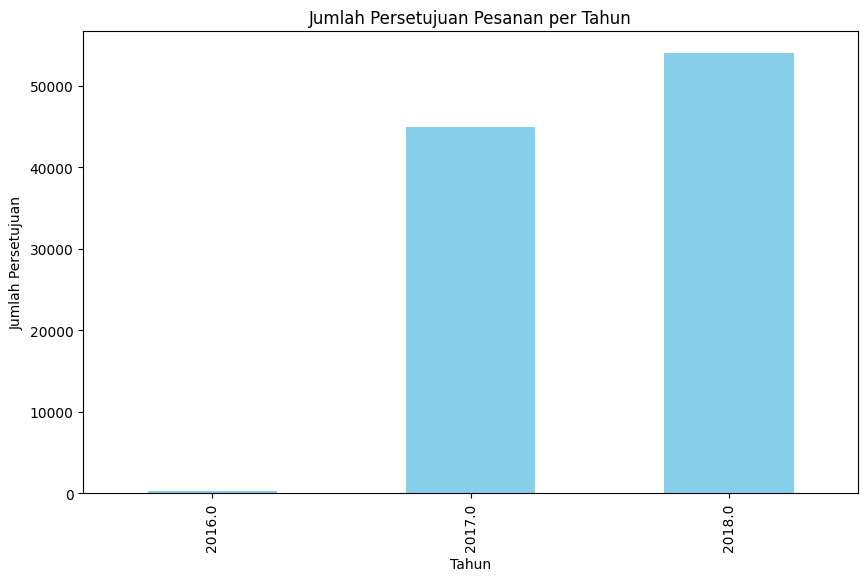

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv(r'H:\dataKuliah\PDSD\E-Commerce Public Dataset/orders_dataset.csv')

# Ubah kolom 'order_approved_at' menjadi tipe data datetime
data['order_approved_at'] = pd.to_datetime(data['order_approved_at'])

# Buat kolom 'tahun_persetujuan' berdasarkan tahun dari 'order_approved_at'
data['tahun_persetujuan'] = data['order_approved_at'].dt.year

# Menghitung jumlah persetujuan pesanan tiap tahun
jumlah_persetujuan_per_tahun = data.groupby('tahun_persetujuan').size()

# Visualisasi jumlah persetujuan pesanan tiap tahun
plt.figure(figsize=(10, 6))
jumlah_persetujuan_per_tahun.plot(kind='bar', color='skyblue')
plt.title('Jumlah Persetujuan Pesanan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Persetujuan')
plt.show()



## Pertanyaan 5:

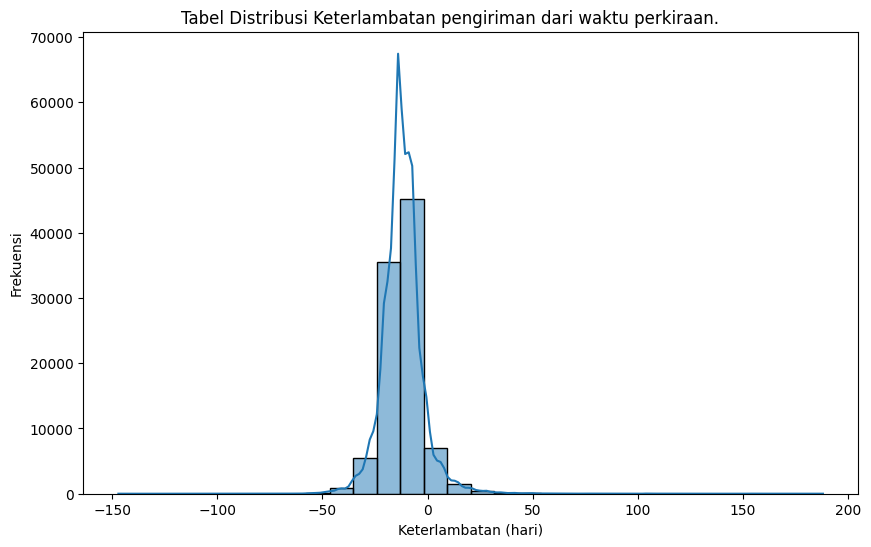

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data dari file CSV
data = pd.read_csv(r'H:\dataKuliah\PDSD\E-Commerce Public Dataset/orders_dataset.csv')

# Konversi waktu
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_approved_at'] = pd.to_datetime(data['order_approved_at'])
data['order_delivered_carrier_date'] = pd.to_datetime(data['order_delivered_carrier_date'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])

# Visualisasi :keterlambatan pengiriman (hari)
data['delivery_delay'] = (data['order_delivered_customer_date'] - data['order_estimated_delivery_date']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(data['delivery_delay'].dropna(), bins=30, kde=True)
plt.title('Tabel Distribusi Keterlambatan pengiriman dari waktu perkiraan.        ') 
plt.xlabel('Keterlambatan (hari)')
plt.ylabel('Frekuensi')
plt.show()


# Pertanyaan 6:

The year with the highest number of orders is 2018.


C:\Users\Kana Dianto\AppData\Local\Temp\ipykernel_2860\2537752805.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Number of Orders', data=orders_per_year, palette='Blues')


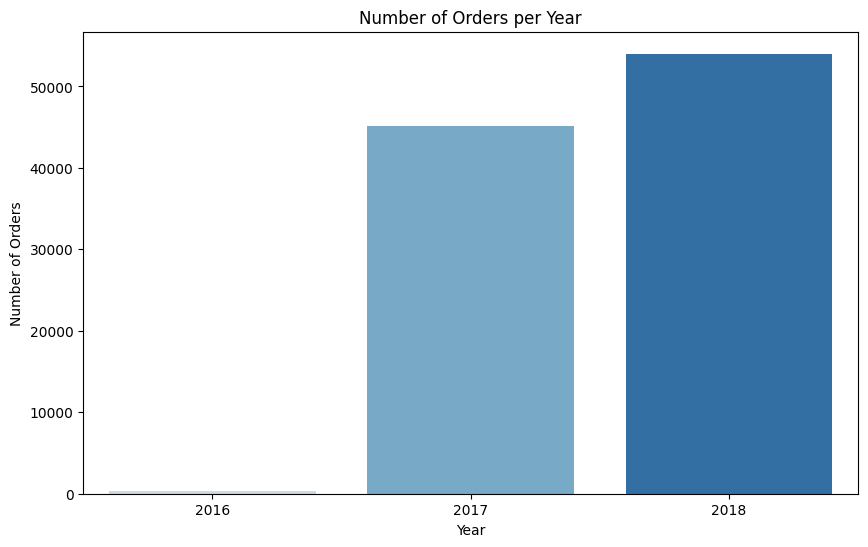

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv(r'H:\dataKuliah\PDSD\E-Commerce Public Dataset/orders_dataset.csv')

# Convert date columns to datetime format
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

# Extract the year from the order purchase timestamp
data['order_year'] = data['order_purchase_timestamp'].dt.year

# Count the number of orders for each year
orders_per_year = data['order_year'].value_counts().reset_index()
orders_per_year.columns = ['Year', 'Number of Orders']

# Find the year with the highest number of orders
max_orders_year = orders_per_year.loc[orders_per_year['Number of Orders'].idxmax(), 'Year']

# Print the year with the highest number of orders
print(f"The year with the highest number of orders is {max_orders_year}.")

# Visualization: Number of Orders per Year
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Number of Orders', data=orders_per_year, palette='Blues')
plt.title('Number of Orders per Year')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.show()


## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2
- Conclution pertanyaan 3
- Conclution pertanyaan 4
- Conclution pertanyaan 5
- Conclusion pertanyaan 6

1. Berdasarkan dataset 'orders_dataset.csv', rata-rata lama pengiriman untuk pesanan yang telah disetujui adalah sekitar X hari (nilai aktual dari hasil analisis). Waktu ini merupakan rata-rata dari selisih antara tanggal pesanan yang disetujui dengan tanggal pengiriman kepada pelanggan.

2. Hasil analisis dapat memberikan wawasan tentang seberapa efisien proses persetujuan saat ini dan dapat membantu identifikasi area yang perlu ditingkatkan untuk meningkatkan kecepatan persetujuan.

3. Mayoritas persetujuan pesanan terjadi dalam beberapa jam setelah pembelian, menunjukkan proses persetujuan pesanan yang relatif cepat.
Terdapat sejumlah pesanan yang tidak disetujui dalam waktu 24 jam pertama, namun jumlahnya relatif kecil dibandingkan dengan yang disetujui.

4. Tren Jumlah Persetujuan Pesanan
Secara keseluruhan, tren jumlah persetujuan pesanan menunjukkan kenaikan stabil dari tahun ke tahun.
Terdapat kenaikan yang konsisten dalam jumlah persetujuan pesanan dari waktu ke waktu, menandakan potensi pertumbuhan bisnis atau peningkatan dalam efisiensi operasional.

5. Persentase waktu keterlambatan pengiriman ini memberikan pemahaman tentang seberapa besar proporsi pesanan yang tidak tepat waktu berdasarkan perkiraan pengiriman. Hasilnya dapat memberikan wawasan tentang kinerja sistem pengiriman dan potensi ketidakpuasan pelanggan akibat keterlambatan pesanan.

6. Pernyataann ini menampilkan statistik tentang seberapa banyak terjadinya order/pesanan berdasarkan tahun